In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:

# Load dataset
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
data = pd.read_csv(url)

# Preprocessing
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:

# Model architecture
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


In [4]:

# Training function
def train_and_compare(optimizers, epochs=20):
    histories = []
    for opt in optimizers:
        model = create_model()
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=256,
                            validation_split=0.2, verbose=0)
        histories.append(history)
    return histories


In [5]:

# Optimizer configurations
optimizer_pairs = [
    (SGD(learning_rate=0.01), SGD(learning_rate=0.01, momentum=0.9)),
    (SGD(learning_rate=0.01, momentum=0.9), SGD(learning_rate=0.01, momentum=0.9, nesterov=True)),
    (Adagrad(learning_rate=0.01), RMSprop(learning_rate=0.01)),
    (RMSprop(learning_rate=0.01), Adam(learning_rate=0.01))
]


In [6]:

# Plotting function
def plot_comparison(histories, labels, comparison_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(histories[0].history['loss'], label=f'{labels[0]} Train')
    plt.plot(histories[0].history['val_loss'], label=f'{labels[0]} Val')
    plt.plot(histories[1].history['loss'], label=f'{labels[1]} Train')
    plt.plot(histories[1].history['val_loss'], label=f'{labels[1]} Val')
    plt.title(f'{comparison_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(histories[0].history['accuracy'], label=f'{labels[0]} Train')
    plt.plot(histories[0].history['val_accuracy'], label=f'{labels[0]} Val')
    plt.plot(histories[1].history['accuracy'], label=f'{labels[1]} Train')
    plt.plot(histories[1].history['val_accuracy'], label=f'{labels[1]} Val')
    plt.title(f'{comparison_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


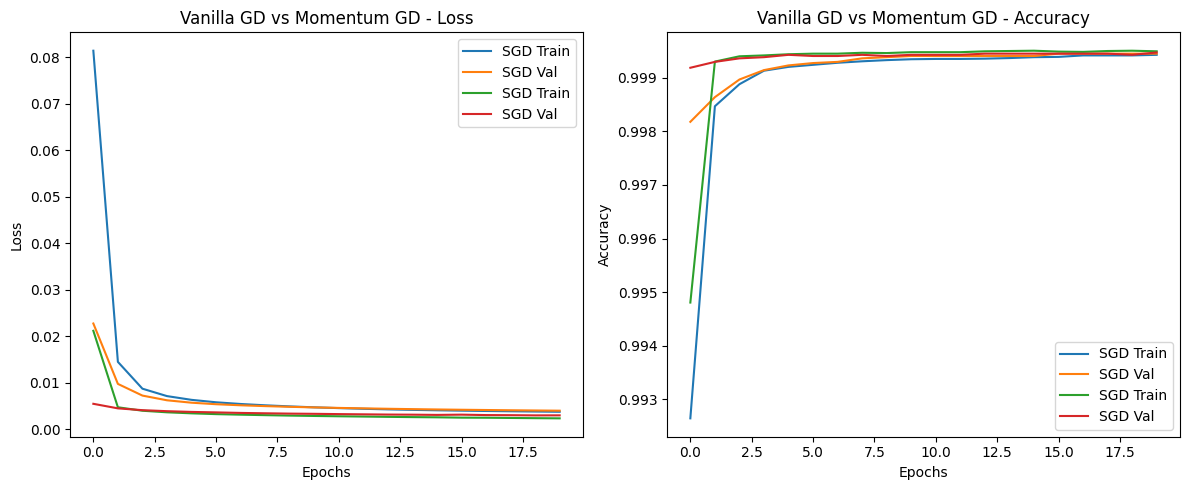

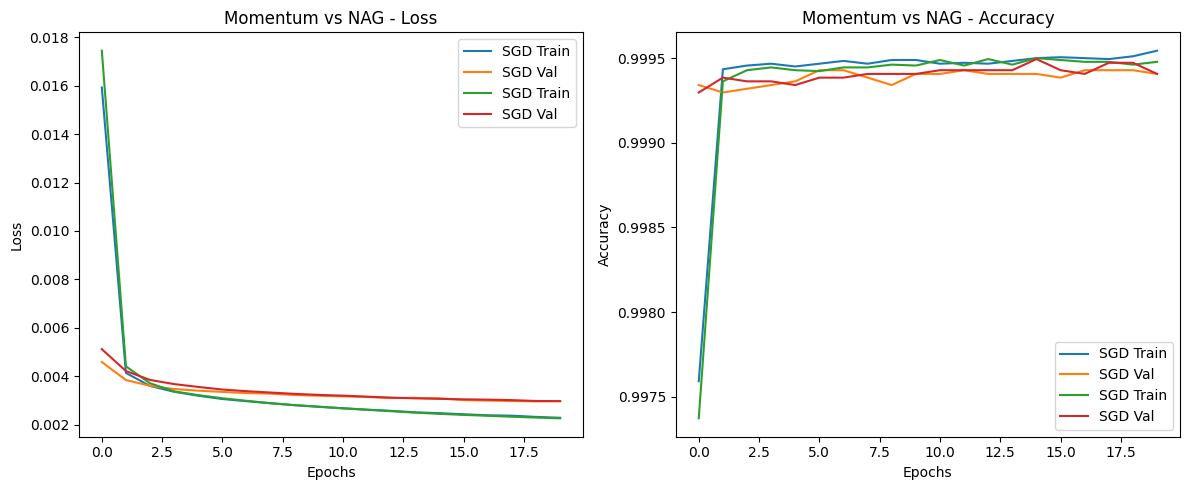

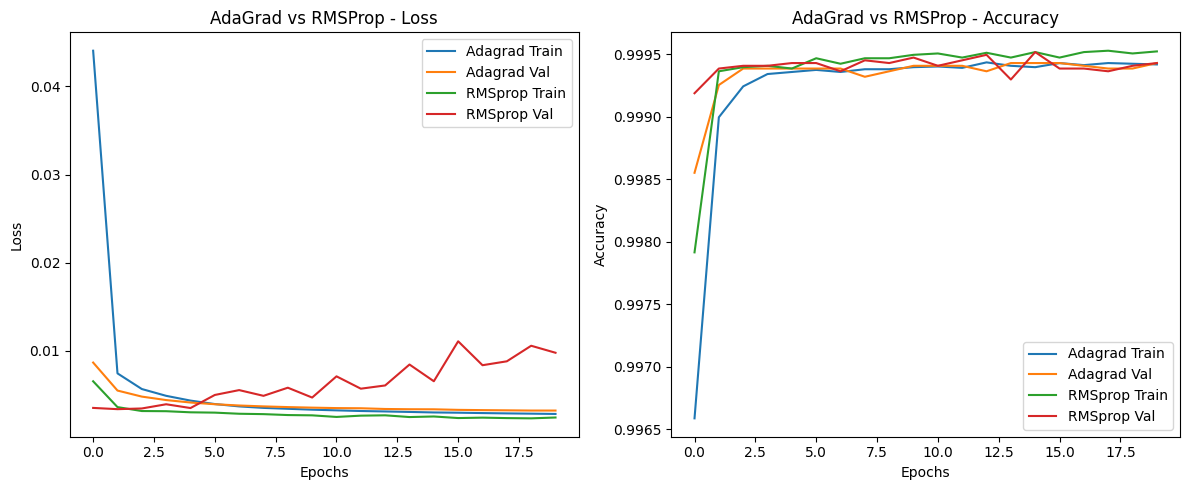

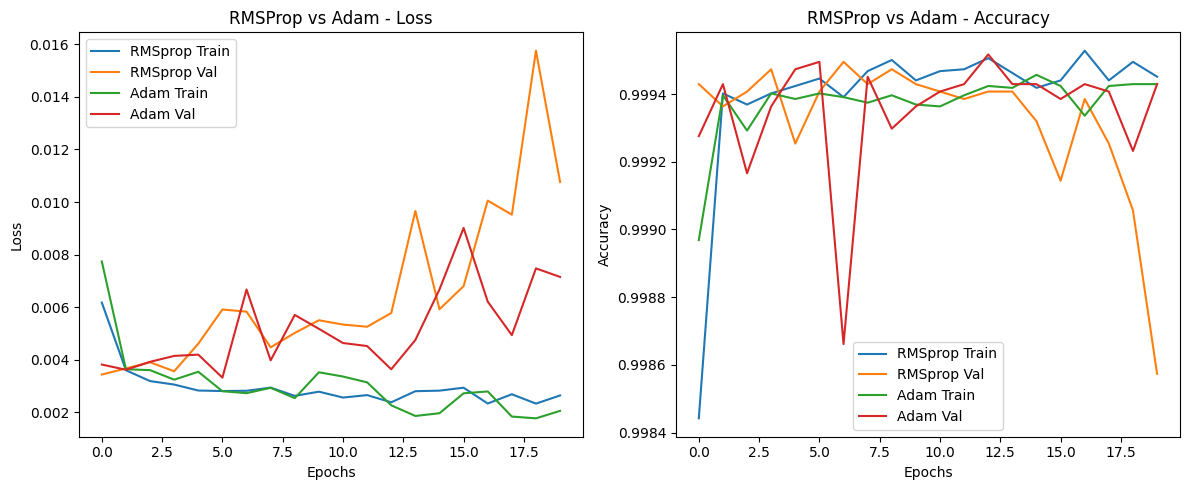

In [7]:

# Train and plot comparisons
comparison_names = [
    'Vanilla GD vs Momentum GD',
    'Momentum vs NAG',
    'AdaGrad vs RMSProp',
    'RMSProp vs Adam'
]

for (opt1, opt2), name in zip(optimizer_pairs, comparison_names):
    histories = train_and_compare([opt1, opt2])
    plot_comparison(histories, [str(opt1.__class__.__name__),
                   str(opt2.__class__.__name__)], name)
